## Importing Libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from sklearn.tree import DecisionTreeClassifier

## Importing datasets and basic inspection

In [2]:
# Importing dataset
loan_df = pd.read_csv("train.csv")

#checking the shape
loan_df.shape

(7500, 18)

In [3]:
# Inspecting 
loan_df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
# Checking for info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

<b>Observations:</b>
1. There are nulls present in several coloumns
2. The data types of all columns look fine

## Data Cleaning

In [5]:
loan_df.columns = [("_".join(col.split(" "))).lower() for col in loan_df.columns]
loan_df.head(2)

,id,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1


In [6]:
cat_cols = loan_df.select_dtypes("object").columns.to_list()
cat_cols

['home_ownership', 'years_in_current_job', 'purpose', 'term']

In [7]:
num_cols = loan_df.select_dtypes(["float64", "int64"]).columns.to_list()
num_cols

['id',
 'annual_income',
 'tax_liens',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'number_of_credit_problems',
 'months_since_last_delinquent',
 'bankruptcies',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'credit_default']

### Null imputation

In [8]:
loan_df.isnull().sum() 

id                                 0
home_ownership                     0
annual_income                   1557
years_in_current_job             371
tax_liens                          0
number_of_open_accounts            0
years_of_credit_history            0
maximum_open_credit                0
number_of_credit_problems          0
months_since_last_delinquent    4081
bankruptcies                      14
purpose                            0
term                               0
current_loan_amount                0
current_credit_balance             0
monthly_debt                       0
credit_score                    1557
credit_default                     0
dtype: int64

In [9]:
# for col in num_cols:
#     if loan_df[col].isnull().sum() > 0:
#         loan_df[col].fillna(loan_df[col].median(), inplace = True)

In [10]:
# for col in cat_cols:
#     if loan_df[col].isnull().sum() > 0:
#         loan_df[col].fillna(loan_df[col].mode()[0], inplace = True)

In [11]:
loan_df.head(20)

,id,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
8,8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1


In [12]:
loan_df.fillna(0, inplace = True)

In [13]:
loan_df.isnull().sum() 

id                              0
home_ownership                  0
annual_income                   0
years_in_current_job            0
tax_liens                       0
number_of_open_accounts         0
years_of_credit_history         0
maximum_open_credit             0
number_of_credit_problems       0
months_since_last_delinquent    0
bankruptcies                    0
purpose                         0
term                            0
current_loan_amount             0
current_credit_balance          0
monthly_debt                    0
credit_score                    0
credit_default                  0
dtype: int64

### Inspecting categorical columns

In [14]:
for col in cat_cols:
    print('Feature Name: ', col)
    print(loan_df[col].value_counts())
    print ("=========================")

Feature Name:  home_ownership
Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: home_ownership, dtype: int64
Feature Name:  years_in_current_job
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
0             371
8 years       339
9 years       259
Name: years_in_current_job, dtype: int64
Feature Name:  purpose
debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: purpose, dtype: int64
Feature Name:  term
Short Term    5556
Long Term     1944
Name: term

In [15]:
# Stripping the word years
loan_df["years_in_current_job"] = loan_df["years_in_current_job"].apply(lambda x: str(x).strip("years"))
loan_df["years_in_current_job"].value_counts()

10+     2332
2        705
3        620
< 1      563
5        516
1        504
4        469
6        426
7        396
0        371
8        339
9        259
Name: years_in_current_job, dtype: int64

### Visualizing categorical columns

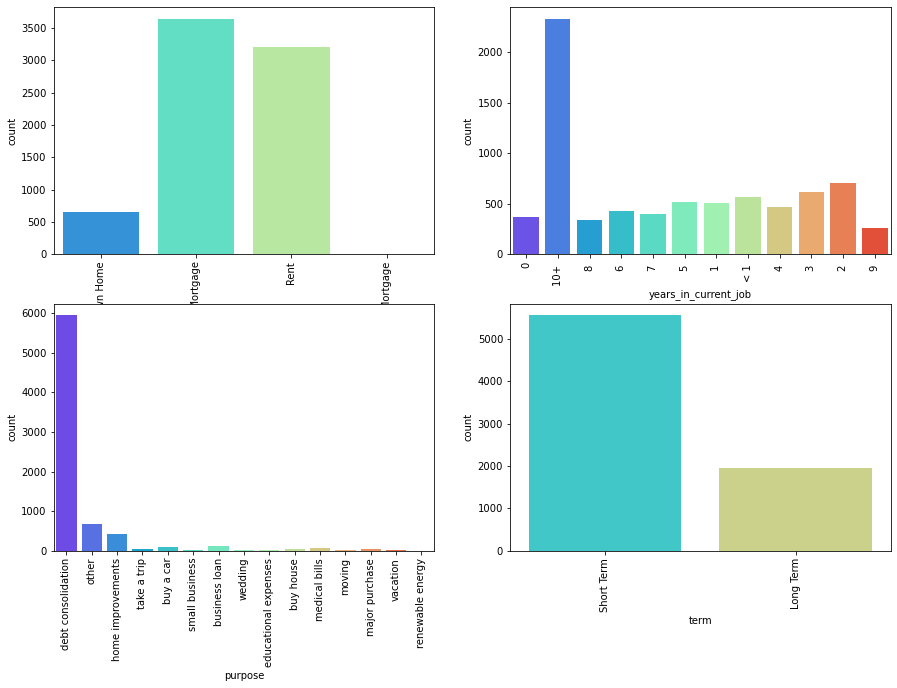

In [16]:
plt.figure(figsize=(15,10))
for i, col_name in enumerate(cat_cols):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(x = col_name, data=loan_df, palette='rainbow')
    plt.xticks(rotation = 90)

### Inspecting numerical columns

In [17]:
loan_df[num_cols].describe()

,id,annual_income,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
count,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000
mean,3749.500000,1.082729e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,15.815200,0.116933,1.187318e+07,2.898332e+05,18314.454133,912.121733,0.281733
std,2165.207842,9.345581e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,22.649441,0.346904,3.192612e+07,3.178714e+05,11926.764673,1502.588014,0.449874
min,0.000000,0.000000e+00,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,0.000000,0.000000
25%,1874.750000,5.327268e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,667.000000,0.000000
50%,3749.500000,9.891305e+05,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,722.000000,0.000000
75%,5624.250000,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,29.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,740.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


### Visualize numerical columns

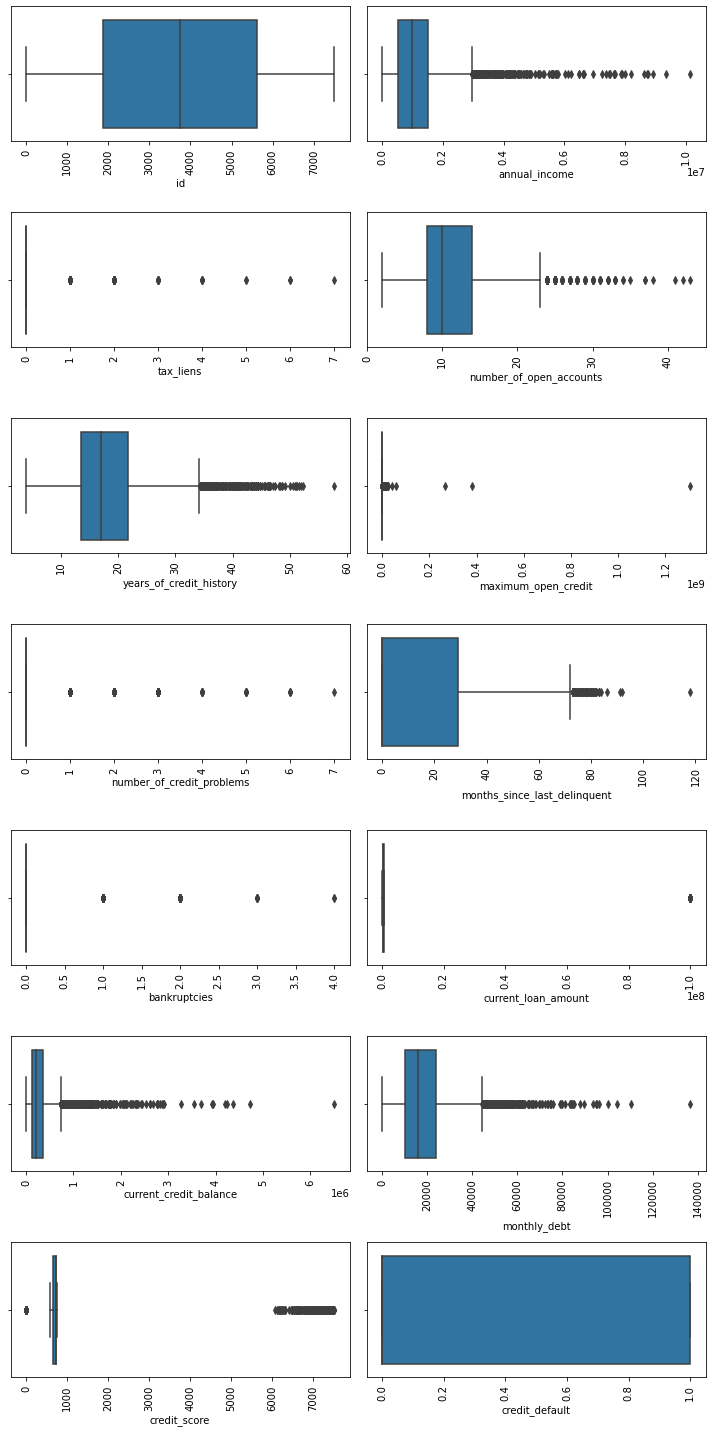

In [18]:
plt.figure(figsize=(10, 20))
for i, col_name in enumerate(num_cols):
    ax = plt.subplot(7,2,i+1)
    sns.boxplot(x = col_name, data=loan_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

## Pre-processing 

### Creating dummy variables


In [19]:
# Create dummies
loan_cat_df = pd.get_dummies(loan_df[cat_cols], drop_first=True)

# # Add dummy columns
loan_df = pd.concat([loan_df, loan_cat_df, ], axis=1)

# Drop original columns
loan_df.drop(cat_cols, axis=1, inplace=True)

In [20]:
X = loan_df.drop(["id","credit_default"], axis=1)
y = loan_df["credit_default"]

### Test - Train split


In [21]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Model

In [25]:
rf = RandomForestClassifier(random_state=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [26]:
lr = LogisticRegression(random_state=100)
lr.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [27]:
# Creating a function to test the train and test set model performance
def evaluate_model(classifier):
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    print('Performance for Train set')
    print('AUC- ROC score ', roc_auc_score(y_train,y_train_pred))
    print("F-1 score: ", f1_score(y_train,y_train_pred))
    print("Accuracy score: ", accuracy_score(y_train,y_train_pred))
    print("-"*50)
    print('Performance for Test set')
    print('AUC- ROC score ', roc_auc_score(y_test,y_test_pred))
    print("F-1 score: ", f1_score(y_test,y_test_pred))
    print("Accuracy score: ", accuracy_score(y_test,y_test_pred))

In [28]:
evaluate_model(rf)

Performance for Train set
AUC- ROC score  1.0
F-1 score:  1.0
Accuracy score:  1.0
--------------------------------------------------
Performance for Test set
AUC- ROC score  1.0
F-1 score:  1.0
Accuracy score:  1.0


In [29]:
evaluate_model(lr)

Performance for Train set
AUC- ROC score  0.5944520193828312
F-1 score:  0.32723239046034386
Accuracy score:  0.7689523809523809
--------------------------------------------------
Performance for Test set
AUC- ROC score  0.5922572212333066
F-1 score:  0.3182957393483709
Accuracy score:  0.7582222222222222


In [30]:
dc = DecisionTreeClassifier(random_state=100)
dc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [31]:
evaluate_model(dc)

Performance for Train set
AUC- ROC score  1.0
F-1 score:  1.0
Accuracy score:  1.0
--------------------------------------------------
Performance for Test set
AUC- ROC score  1.0
F-1 score:  1.0
Accuracy score:  1.0
